In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [8]:
pd.set_option('display.max_column',None)

In [9]:
original_df = pd.read_csv('../Dataset/02_cleaned_data.csv')

In [10]:
df = original_df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

## Preliminary Analysis

In [12]:
df.isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day          0
distance                3630
dtype: int64

In [14]:
#total num of rows with missing values
df.isna().any(axis=1).sum()

7438

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [19]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [30]:
#check duplicate
num_cols = ['age','ratings','restaurant_latitude','restaurant_longitude','delivery_latitude','delivery_longitude','time_taken','pickup_time_minutes','distance']
cat_cols = [col for col in df.columns if col not in num_cols]

In [31]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day']

In [32]:
len(num_cols) , len(cat_cols)

(9, 17)

In [35]:
df.assign(**{
    col: df[col].astype('object') for col in cat_cols
}).describe(include='object').T

,count,unique,top,freq
rider_id,45502,1320,PUNERES01DEL01,67
order_date,45502,44,2022-03-15,1190
weather,44977,6,Fog,7654
traffic,44992,4,low,15477
vehicle_condition,45502,4,2,15034
type_of_order,45502,4,snack,11512
type_of_vehicle,45502,4,motorcycle,26427
multiple_deliveries,44509.0,4.0,1.0,28109.0
festival,45274,2,no,44380
city_type,44304,3,metropolitian,34029


## Functions to perform analysis

### Numerical Analysis

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/1564148069.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


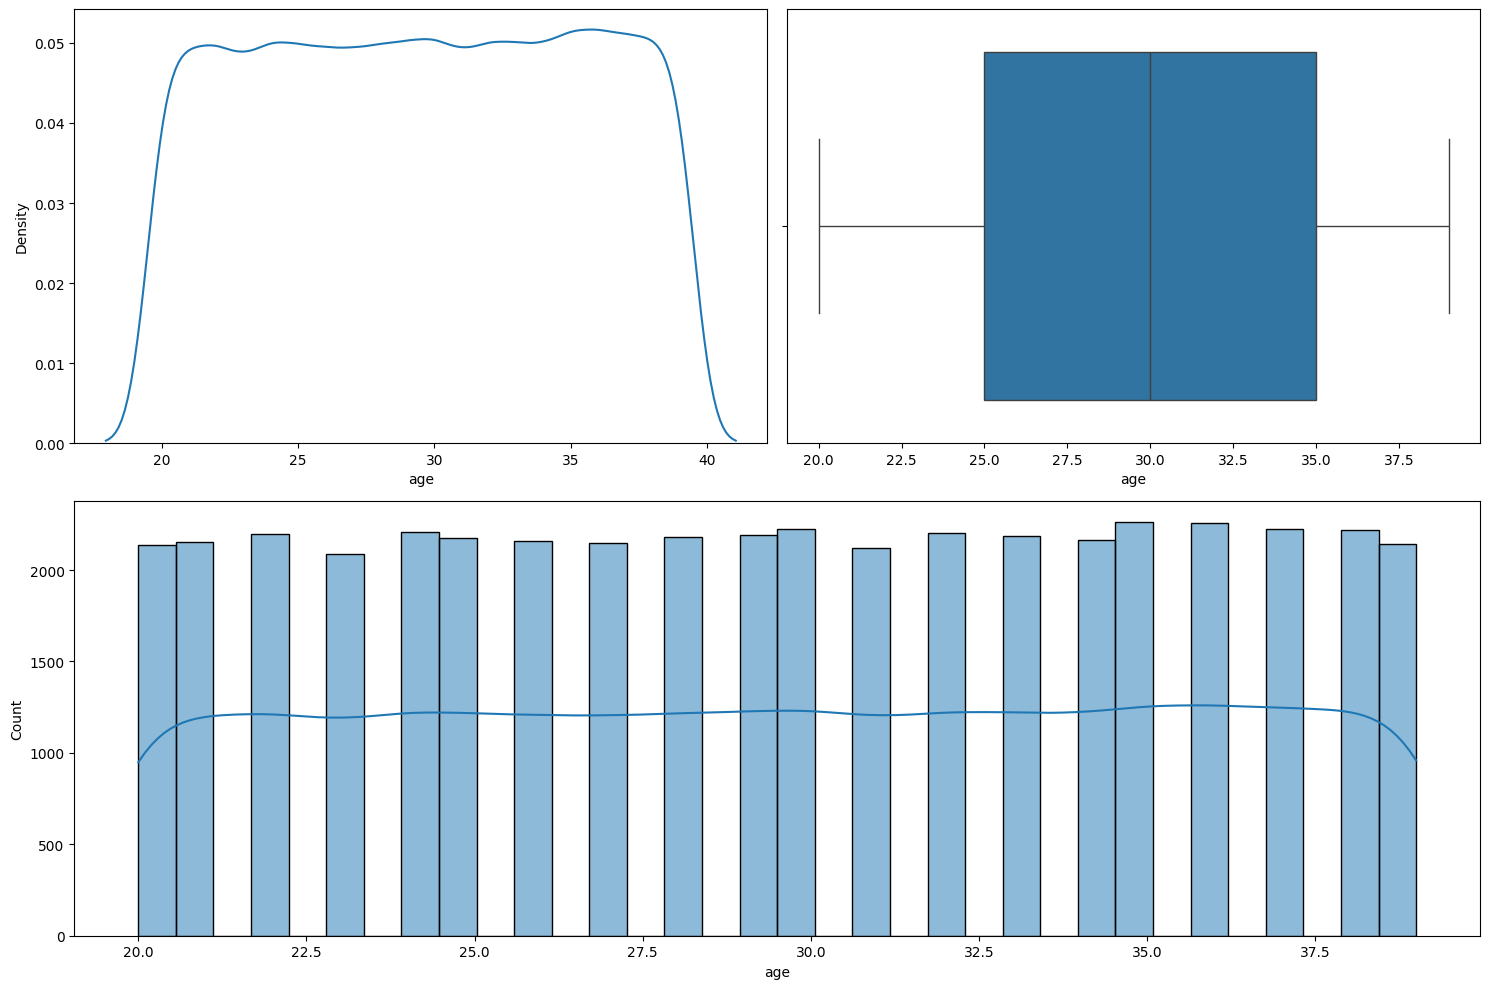

In [48]:
def numerical_analysis(dataframe,column_name,cat_col=None,bins ='auto'):
	fig = plt.figure(figsize=(15,10))
	grid = GridSpec(nrows=2,ncols=2,figure=fig)
   
	axis1 = fig.add_subplot(grid[0,0])
	axis2 = fig.add_subplot(grid[0,1])
	axis3= fig.add_subplot(grid[1,:])
	
	sns.kdeplot(data= dataframe,x=column_name,hue=cat_col , ax=axis1)
	sns.boxplot(data=dataframe,x=column_name,hue=cat_col,ax = axis2)
	sns.histplot
	sns.histplot(data=dataframe,x=column_name,hue=cat_col,bins=bins,kde=True,ax=axis3)
	plt.tight_layout()
	fig.show()

numerical_analysis(df,'age')

### numerical categorical analysis

In [57]:
def numerical_categorical_analysis(dataframe,num_col,cat_col):
	fig,axis = plt.subplots(nrows=2,ncols=2,figsize = (15,10))
	
	sns.barplot(data= dataframe,x=cat_col,y=num_col,ax=axis[0][0])
	axis[0][0].set_title(f'{cat_col} vs {num_col} barplot')
	# axis[0][0].tick_params(axis = 'x',rotation = 45)
	
	sns.boxplot(data=dataframe,x=cat_col,y=num_col,ax=axis[0][1])
	axis[0][1].set_title(f'{cat_col} vs {num_col} boxplot')

	sns.violinplot(data=dataframe,x=cat_col,y=num_col,ax=axis[1][0])
	axis[1][0].set_title(f'{cat_col} vs {num_col} violinplot')

	sns.stripplot(data=dataframe,x=cat_col,y=num_col,ax=axis[1][1])
	axis[1][1].set_title(f'{cat_col} vs {num_col} stripplot')
	plt.tight_layout()
	fig.show()

### Categorical analysis

In [64]:
def categorical_analysis(dataframe,cat_col):
 display(
  pd.DataFrame({
					"Count":dataframe[cat_col].value_counts(),
					"Percentage":dataframe[cat_col].value_counts(normalize=True).mul(100).round(2).astype('str').add('%')
     })
     )
 print(f'num of unique categories = {dataframe[cat_col].nunique()}')
 print(f'unique categories = {dataframe[cat_col].unique()}')
 sns.countplot(data=dataframe,x=cat_col)
 plt.xticks(rotation = 45)
 plt.show()



### chi2 test

In [75]:
#chi squre test for independence
from scipy.stats import chi2_contingency
def chi_2_test(dataframe,col1,col2,alpha=0.05):
 data = dataframe.loc[:,[col1,col2]].dropna()
 
	#create contingency table
 contingency_table = pd.crosstab(index = data[col1],columns=data[col2])
 chi_stat,p_value,dof,expect_values_table= chi2_contingency(contingency_table)
 print('p-value is ',p_value)
 if p_value<=alpha:
  print(f'reject the null hypothesis --> There is significant association between {col1} and {col2}')
 else:
  print(f'cannot reject the null hypothesis --> There is no significant association between {col1} and {col2}')
 display(contingency_table , expect_values_table)

chi_2_test(df,'weather','traffic')

p-value is  0.4796388074753828
cannot reject the null hypothesis --> There is no significant association between weather and traffic


traffic,high,jam,low,medium
weather,,,,
Cloudy,744,2349,2605,1838
Fog,776,2429,2597,1852
Sandstorms,701,2399,2609,1786
Stormy,733,2323,2699,1831
Sunny,735,2289,2475,1785
Windy,735,2351,2484,1852


array([[ 741.25139516, 2369.18958579, 2591.86659848, 1833.69242057],
       [ 752.85803855, 2406.28676879, 2632.45049692, 1862.40469573],
       [ 737.21857838, 2356.29988661, 2577.76541343, 1823.71612157],
       [ 746.16946439, 2384.90873113, 2609.06316562, 1845.85863886],
       [ 716.46432621, 2289.96509327, 2505.19590013, 1772.37468039],
       [ 730.0381973 , 2333.34993441, 2552.65842542, 1805.95344287]])

## Anova

In [81]:
from scipy.stats import f_oneway
def anova_test(dataframe,num_col,cat_col,alpha=0.05):
 
 data = dataframe.loc[:,[num_col,cat_col]].dropna()
 
 cat_group = dataframe.groupby(cat_col)
 groups = [group[num_col].values for label,group in cat_group]
 f_stat,p_val = f_oneway(*groups)
 if p_val<=alpha:
  print(f'reject null hypothesis -> thre is significant relation between {cat_col} and {num_col}')
 else:
  print(f'cannot reject null hypothesis -> no significant relation between {cat_col} and {num_col}')

anova_test(df,'age','weather')

cannot reject null hypothesis -> no significant relation between weather and age


## test for normality

In [ ]:
#jarque bera test applied as shapiro-wilk test not reliable for large data (>~5K rows)
from scipy.stats import jarque_bera
def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")

## Analysing Columns 

In [83]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

### time_taken --> Target Column

In [85]:
df['time_taken'].dtype

dtype('int64')

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/1564148069.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


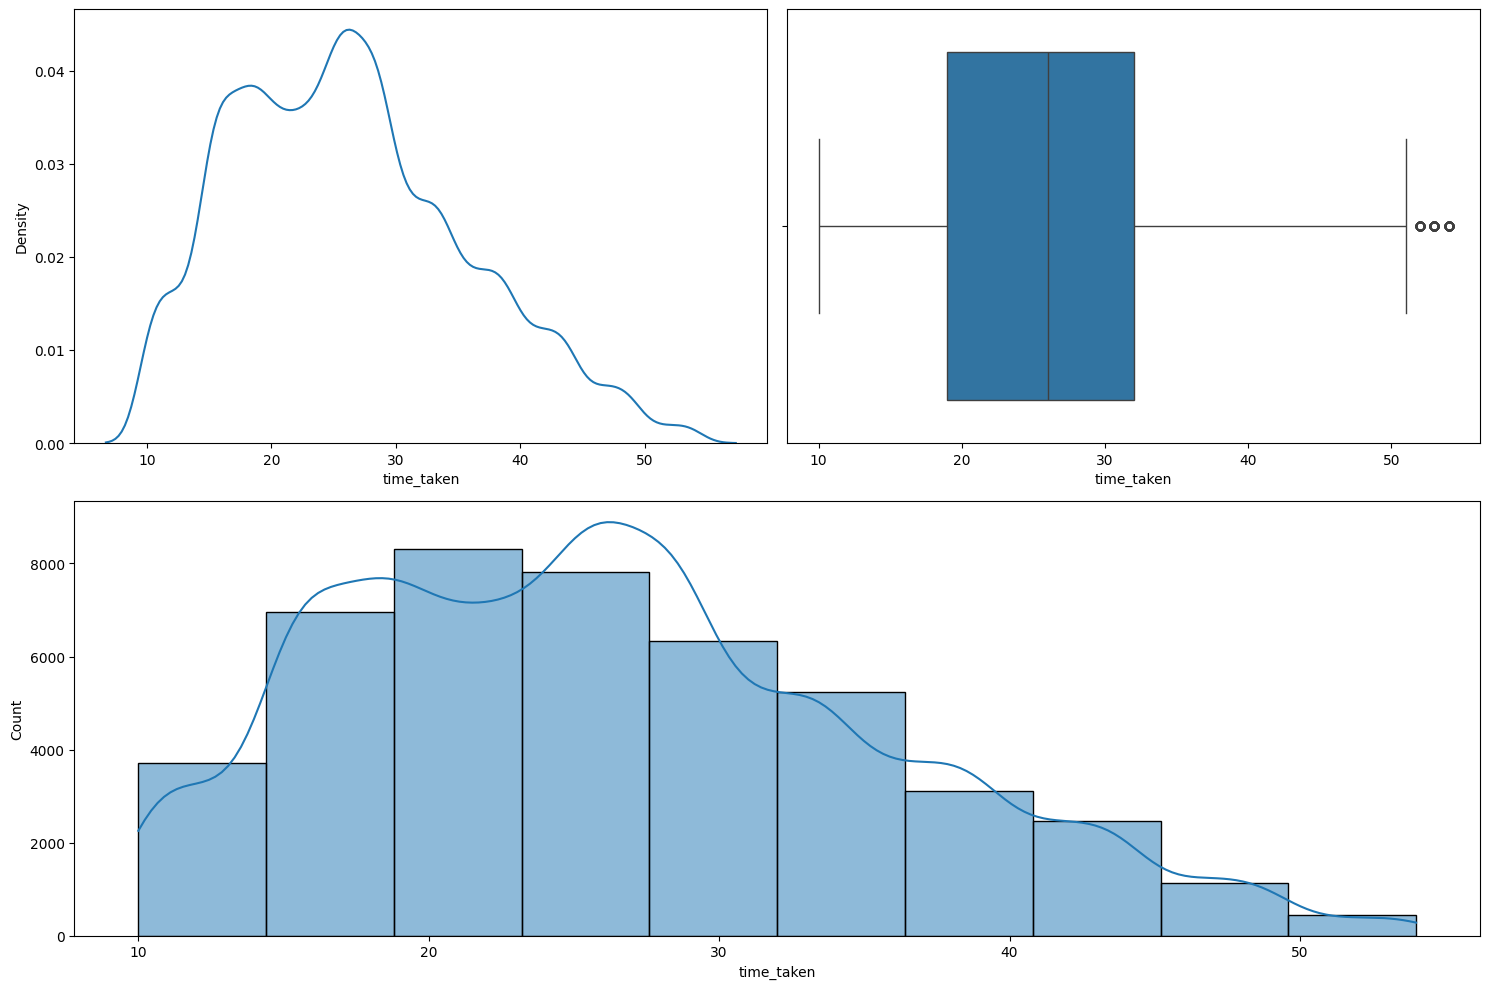

In [87]:
#numerical analysis
numerical_analysis(df,'time_taken',bins=10)

In [88]:
df['time_taken'].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

#### Obs:
1. Looks to be bimodal , 1 peak around 17-18 and another around 26-27
2. Some outliers in the upper range, lower range seems clean
3. Not fully continuous distribution

((array([-4.16995158, -3.96319864, -3.8504397 , ...,  3.8504397 ,
          3.96319864,  4.16995158]),
  array([10, 10, 10, ..., 54, 54, 54])),
 (9.264045148605508, 26.297591314667482, 0.9868843995770017))

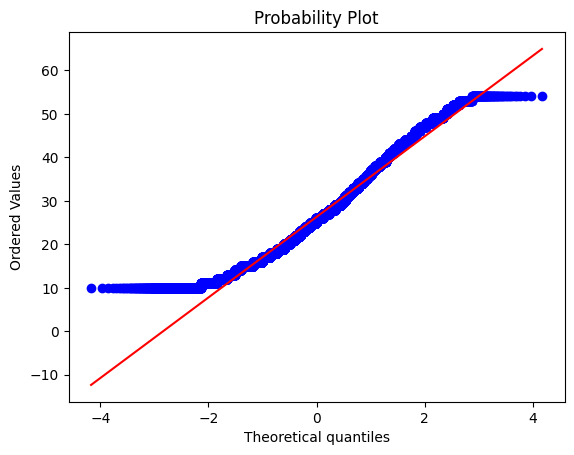

In [ ]:
#check if distribution is normal
stats.probplot(x=df['time_taken'],dist='norm',plot=plt)

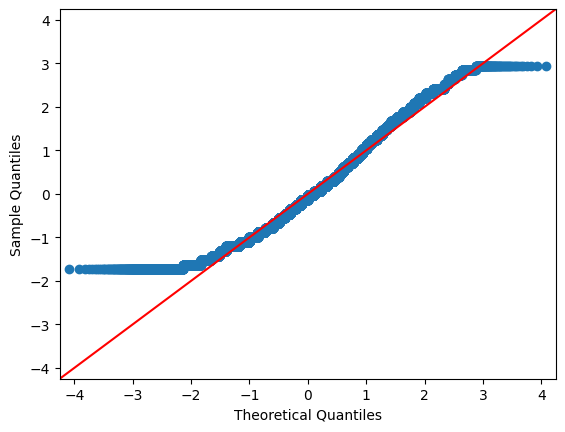

In [ ]:
fig = sm.qqplot(df['time_taken'],fit=True ,line='45')

In [101]:
#test for normality
test_for_normality(df,'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [106]:
#checking out rows where data is acting as outlier
IQR = df['time_taken'].quantile(0.75) - df['time_taken'].quantile(0.25)

upper_bound = df['time_taken'].quantile(0.75) + 1.5*IQR
upper_bound

51.5

In [ ]:
outlier_df = df[df['time_taken']>upper_bound]
outlier_df['traffic'].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

- OBS
Seems like jam is strong contributor to high delivery time

In [111]:
outlier_df['weather'].value_counts()

weather
Fog           57
Sunny         51
Cloudy        44
Windy         44
Stormy        37
Sandstorms    32
Name: count, dtype: int64

In [114]:
outlier_df['distance'].mean() , df['distance'].mean()

(13.29215081388658, 9.719296323199579)

##### OBS
- Distance for outlier times is higher than average time for overall data
- Distance can be a contributing factor

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/1564148069.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


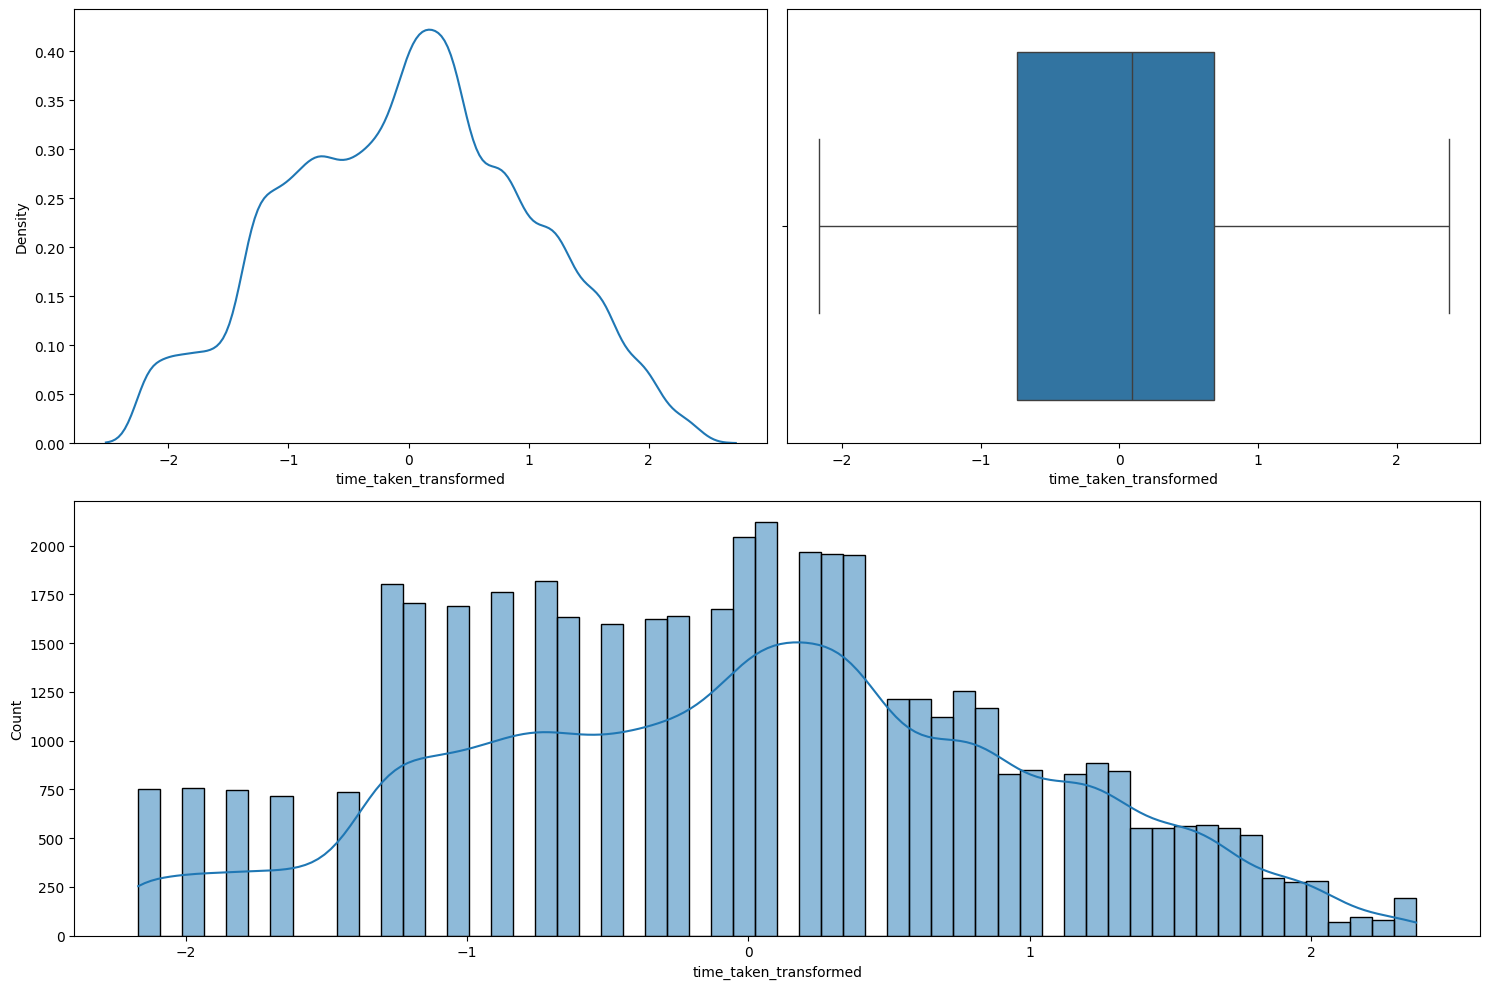

In [ ]:
# try to make the distibution normal like
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

time_taken_tranformed_df = pd.DataFrame(pt.fit_transform(df[['time_taken']]),columns=['time_taken_transformed'])

numerical_analysis(time_taken_tranformed_df,'time_taken_transformed')
# seems to remove outliers and make the distribution
#also bimodal distibution changed to unimodal


((array([-4.16995158, -3.96319864, -3.8504397 , ...,  3.8504397 ,
          3.96319864,  4.16995158]),
  array([-2.16837776, -2.16837776, -2.16837776, ...,  2.37354703,
          2.37354703,  2.37354703])),
 (0.9953574239385332, 1.1012895908410877e-15, 0.9952675528665531))

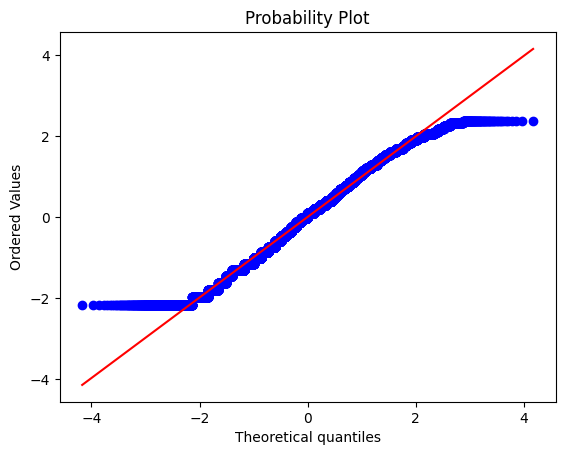

In [125]:
stats.probplot(x= time_taken_tranformed_df['time_taken_transformed'],plot=plt)

- Slight improvement, not much

In [126]:
df['time_taken_pt'] = time_taken_tranformed_df.values

## Age

In [127]:
df['age'].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/1564148069.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


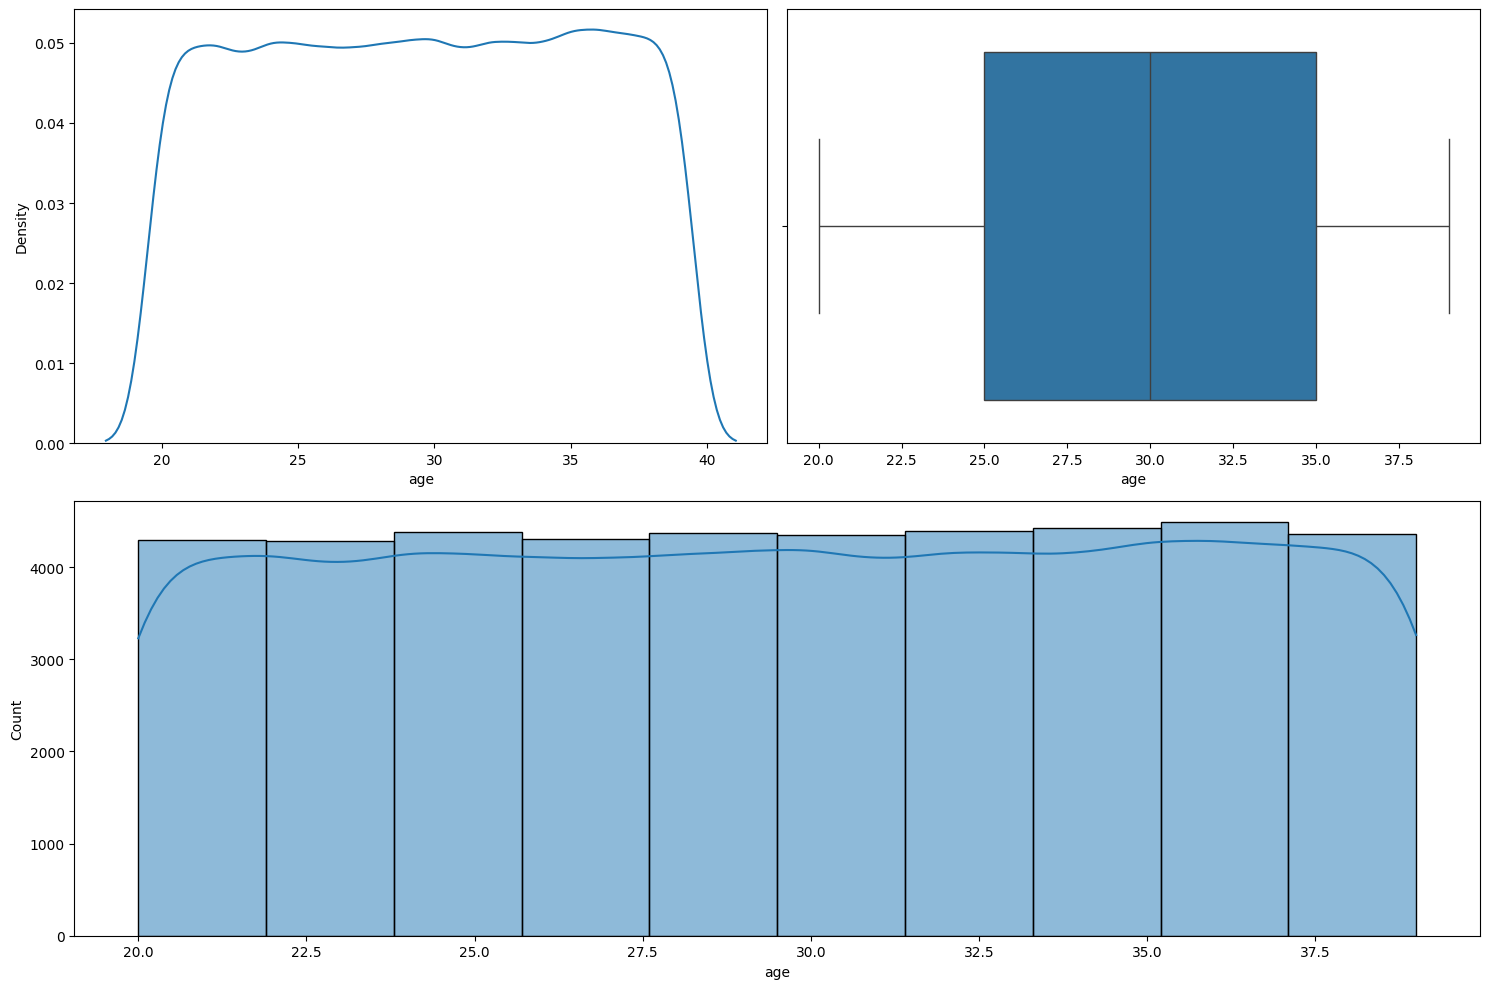

In [129]:
#numerical analysis for age
numerical_analysis(df,'age',bins=10)

- age seems to be uniformly distributed
- No outliers

<Axes: xlabel='age', ylabel='time_taken'>

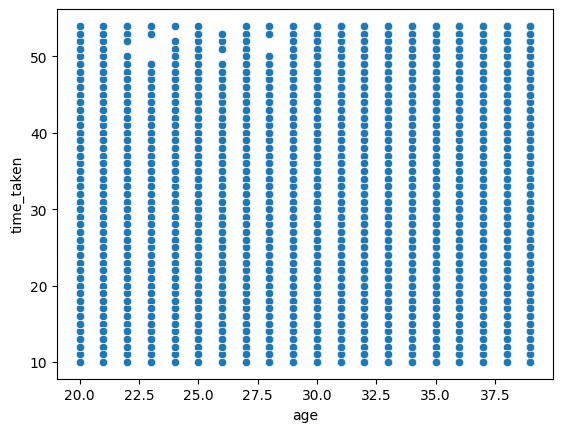

In [131]:
#check relationship with target
sns.scatterplot(data=df,x='age',y='time_taken')

- No director pattern is observed.
- Does not seem to directly impact delivery time
- age is a discrete column

<Axes: xlabel='age', ylabel='time_taken'>

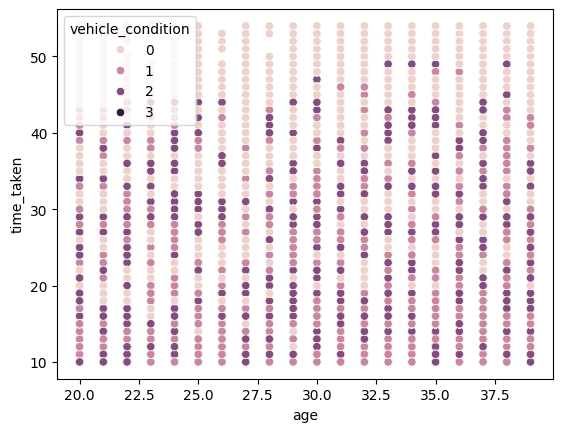

In [134]:

sns.scatterplot(data=df,x='age',y='time_taken',hue='vehicle_condition' )

- No preference for vehicle condition with age
- But observed that for longer delivery_time, vehicle condition 0 is preffered

## Ratings

In [136]:
df['ratings'].describe()

count    43594.000000
mean         4.635287
std          0.313827
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/1564148069.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


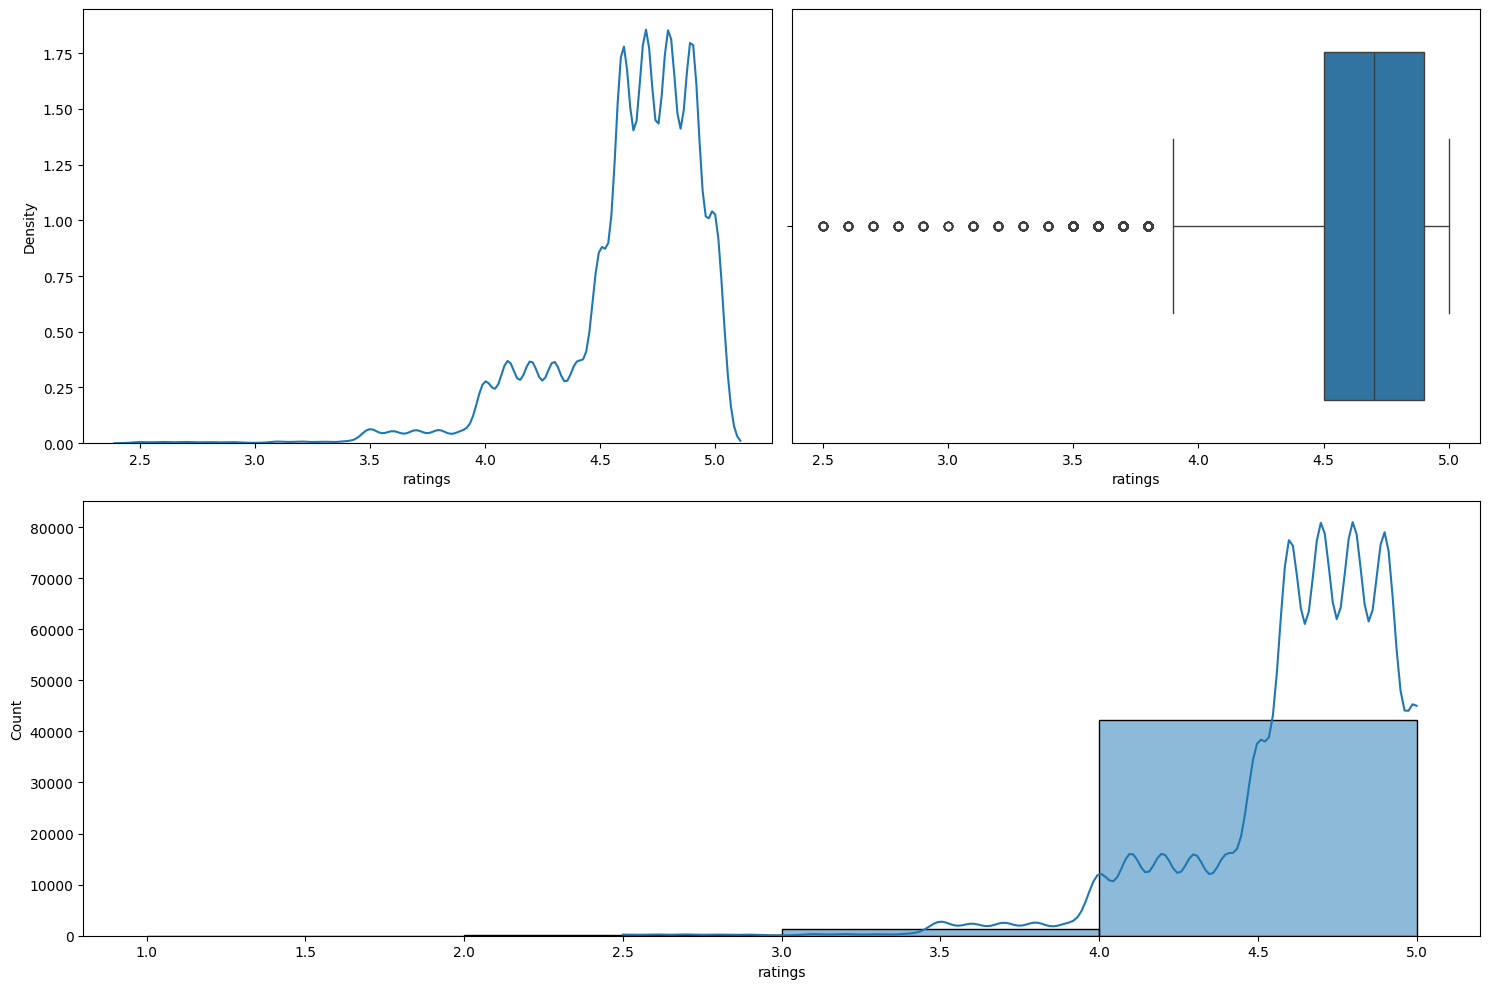

In [137]:
numerical_analysis(df,'ratings',bins = [1,2,3,4,5])

In [ ]:
#counting values in each bin
pd.cut(df['ratings'], bins=[1,2,3,4,5], right=True).value_counts()

ratings
(4, 5]    41188
(3, 4]     2298
(2, 3]      108
(1, 2]        0
Name: count, dtype: int64

- Data is highly right skewed

<Axes: xlabel='ratings', ylabel='time_taken'>

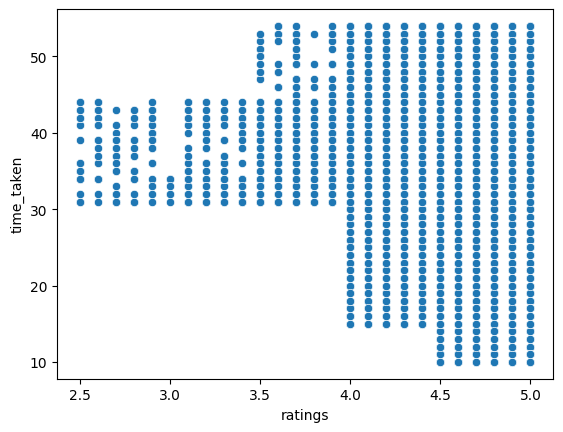

In [141]:
sns.scatterplot(data=df,x='ratings' , y='time_taken')

- seems like riders with higer ratings 4.0 and above, get more orders and more spread in distance(linked to time_taken)

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/187565492.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


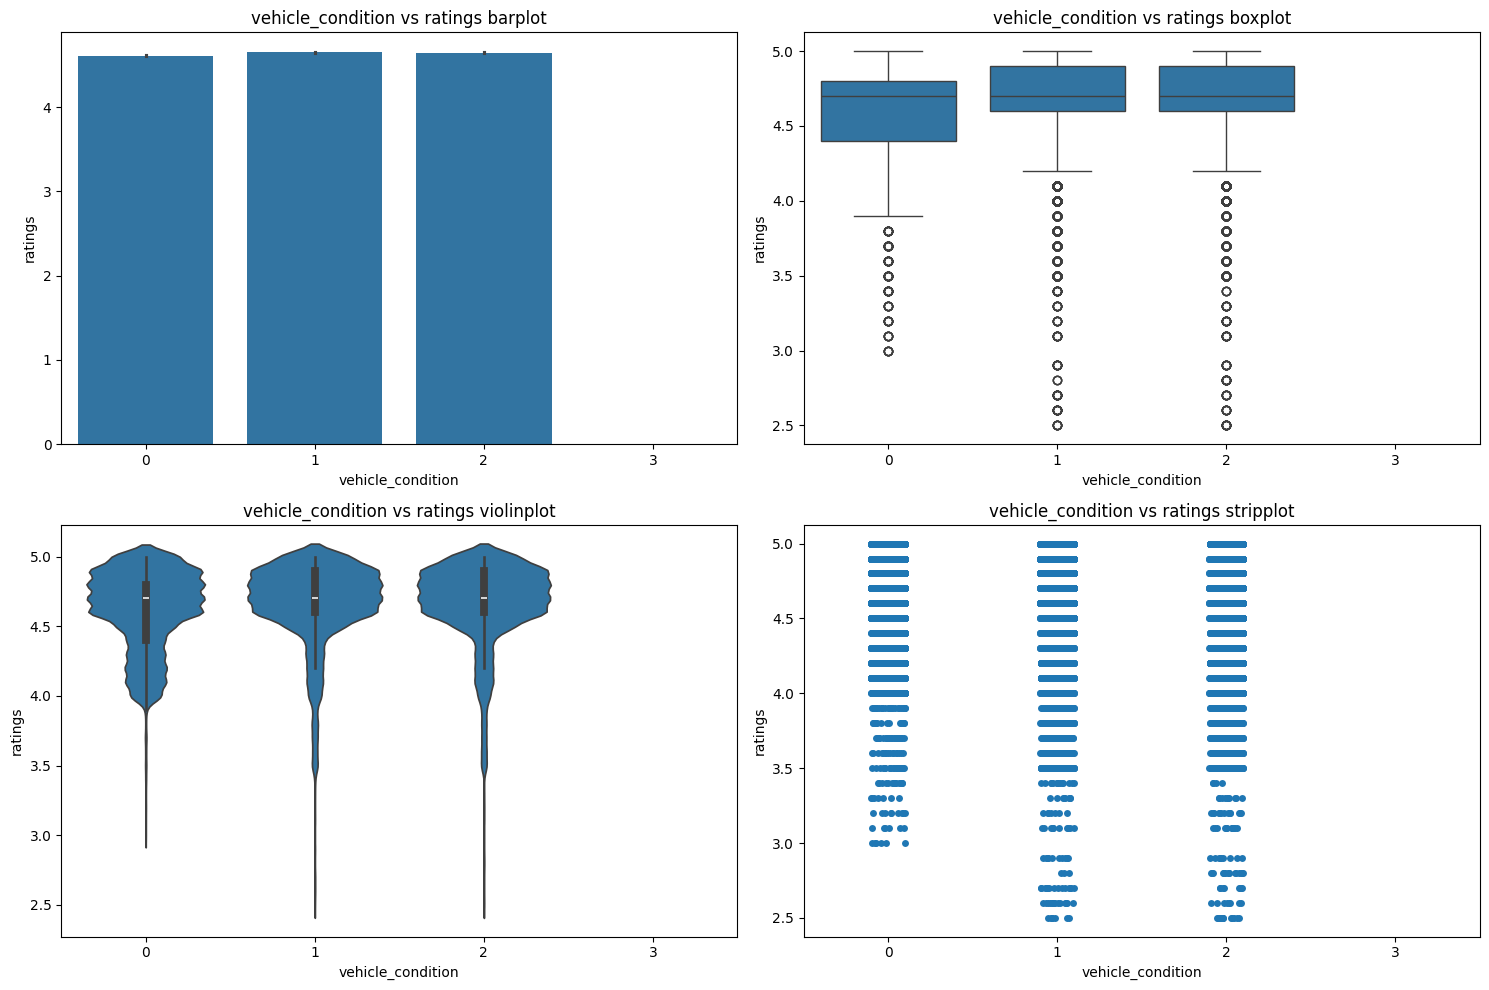

In [147]:
#relation between vehicle condition and rating
numerical_categorical_analysis(df,'ratings', 'vehicle_condition')

- No rating data available for vehicle condition 3(worst condition)
- looking at stripplot -> best vehicle condition(0) has slightly between ratings in lower side

In [ ]:
df[(df['vehicle_condition']==3) & (~df['ratings'].isna())]
#all rows where vehicle condition = 3(worst condition) rating is missing

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,time_taken_pt
